In [1]:
from matplotlib import pyplot as plt # importing all necessary Libraries 
import pandas as pd
dataframe = pd.read_csv(r"landslide_data3.csv")    # Reading landslide_data3.csv file using panda

In [2]:
# defining all function for calculating mean, median, mode, max, min, standard deviation using pandas library 
def Mean(s): 
    return (dataframe[s].mean(axis=0))   
def Median(s):
    return (dataframe[s].median(axis=0))
def Maxi(s):
    return (dataframe[s].max(axis=0))
def Mini(s):
    return (dataframe[s].min(axis=0))
def Std(s):
    return (dataframe[s].std(axis=0))
def Mode(s):
    return (dataframe[s].mode()[0])


In [3]:
#-------------------------QUESTION 1-----------------------------------#

def Q1 ():
    attributes=['temperature','humidity','pressure','rain','lightavgw/o0','lightmax','moisture']    
    MeanList=[];MedianList=[];ModeList=[];MaxList=[];MinList=[];StdList=[]
    for i in attributes: # using loop to call all function for each attributes
        MeanList.append(Mean(i))
        MedianList.append(Median(i))
        ModeList.append(Mode(i))
        MaxList.append(Maxi(i))
        MinList.append(Mini(i))
        StdList.append(Std(i))
    data1 = {"Attributes":attributes, # formaing data in tabular form
            "Mean": MeanList,
            "Median": MedianList,
            "Mode": ModeList}
    data2 = {"Attributes":attributes, # formaing data in tabular form
            "Max": MaxList,
            "Min": MinList,
            "Std":StdList}
    ans = pd.DataFrame(data1)
    ans = ans.set_index(['Attributes'])# setting attributes as an index
    print(ans)
    ans = pd.DataFrame(data2)
    ans = ans.set_index(['Attributes'])# setting attributes as an index
    print(ans)

In [4]:
Q1()

                      Mean       Median         Mode
Attributes                                          
temperature      21.214888    22.272730    12.727270
humidity         83.479932    91.380950    99.000000
pressure       1009.008774  1014.677832   789.392692
rain          10701.538370    18.000000     0.000000
lightavgw/o0   4438.428453  1656.880000  4488.910300
lightmax      21788.623280  6634.000000  4000.000000
moisture         32.386053    16.704200     0.000000
                    Max          Min           Std
Attributes                                        
temperature      31.375     7.672900      4.355818
humidity         99.720    31.000000     18.210065
pressure       1079.162   452.097887     46.980477
rain          82037.250     0.000000  24852.255288
lightavgw/o0  54612.000     0.000000   7573.162806
lightmax      54612.000  2259.000000  22064.993089
moisture        100.000     0.000000     33.653245


In [5]:
#--------------------------QUESTION 2----------------------------------#


def Scatter_plot (s,xAttribute): # defining function to plot scatter graph of particular attribute
	fig,axs=plt.subplots(2,3,figsize=(15,9))
	colors = ['red','gold','green','blue','lightcoral','lightskyblue']
	count=0
	for r in range(2):
	    for i in range(3):
	        dataframe.plot.scatter(x=xAttribute,y=s[count],ax=axs[r,i],color=colors[count],grid=True)# using scatter function ploting scatter plot 
	        count+=1
	        fig.tight_layout(pad=3.0)
	plt.show() 

In [6]:
Q2()

NameError: name 'Q2' is not defined

In [7]:
def Q2 ():

	#-----------------2a-----------------------#
    print()
    print('2(a).  Scatter Plot btw Rain and other attribute')
    attrForRain = ['temperature','humidity','pressure','lightavgw/o0','lightmax','moisture']# list of attribute to plot with rain
    Scatter_plot(attrForRain,'rain') # calling function to plot scatter graph 

	#-----------------2b-----------------------#
    print()
    print('2(b).  Scatter Plot btw Temperature and other attribute')
    attrForTemp = ['humidity','pressure','rain','lightavgw/o0','lightmax','moisture'] # list of attribute to plot with temperature
    Scatter_plot(attrForTemp,'temperature') # calling function to plot scatter graph 


2(a).  Scatter Plot btw Rain and other attribute


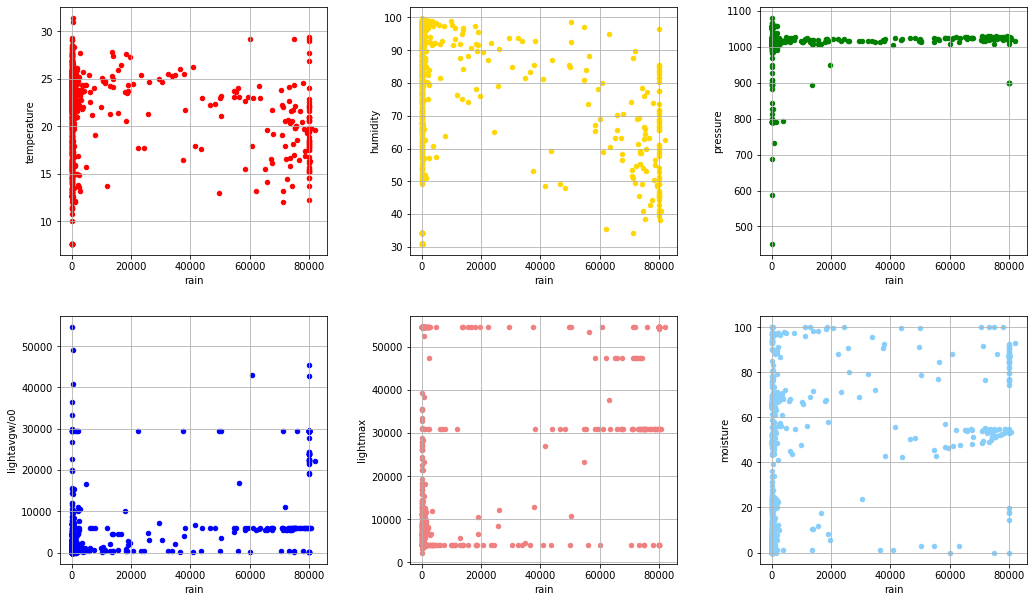


2(b).  Scatter Plot btw Temperature and other attribute


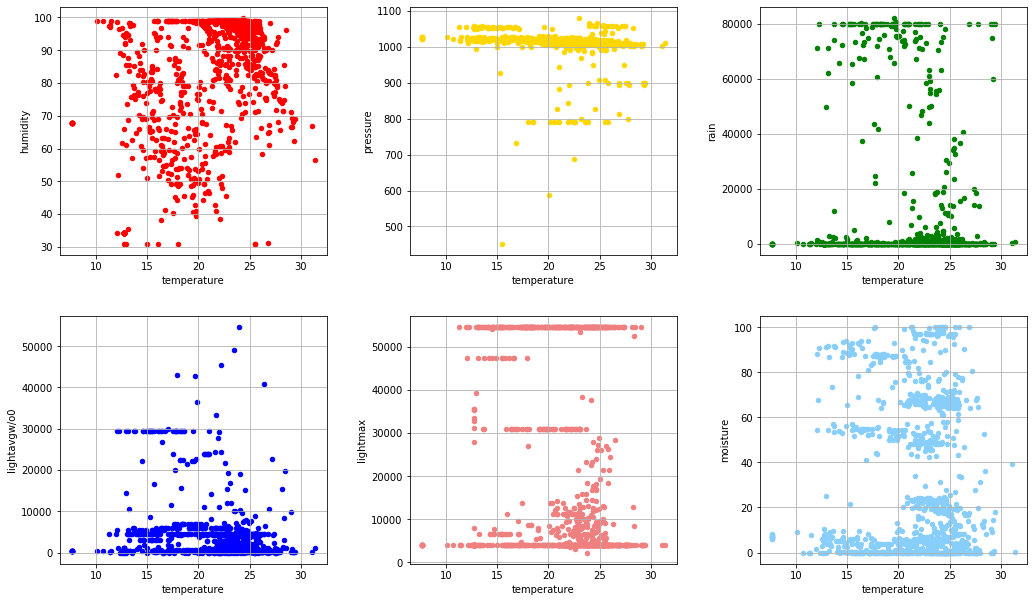

In [8]:
Q2()

In [9]:
#--------------------------QUESTION 3---------------------------------#

def Correlation (s,corrWith): # defining function to calculate correlation 
	Corr=[]
	for i in s:
	    Corr.append(dataframe[corrWith].corr(dataframe[i]))    # using corr function to calculate correlation coefficient between two attributes
	data = {"Attribute":s,"Correlation with "+corrWith:Corr}
	ans = pd.DataFrame(data)
	ans = ans.set_index(['Attribute'])# setting attributes as an index
	print(ans)

In [10]:
def Q3 ():

	#-----------------3a------------------#
    print()
    print('3(a).  Correlation btw Rain and other attribute')
    corrAttrWithRain=['temperature','humidity','pressure','lightavgw/o0','lightmax','moisture'] # list of attribute to calculate correlation with rain
    Correlation(corrAttrWithRain,'rain') # calling function to calculate correlation

	#-----------------3b------------------#
    print()
    print('3(b).  Correlation btw Temperature and other attribute')
    corrAttrWithTemp=['humidity','pressure','rain','lightavgw/o0','lightmax','moisture']# list of attribute to calculate correlation with temperature
    Correlation(corrAttrWithTemp,'temperature') # calling function to calculate correlation


In [11]:
Q3()


3(a).  Correlation btw Rain and other attribute
              Correlation with rain
Attribute                          
temperature               -0.108893
humidity                  -0.434917
pressure                   0.070785
lightavgw/o0               0.527490
lightmax                   0.312843
moisture                   0.426928

3(b).  Correlation btw Temperature and other attribute
              Correlation with temperature
Attribute                                 
humidity                          0.401570
pressure                         -0.181389
rain                             -0.108893
lightavgw/o0                     -0.181400
lightmax                         -0.145884
moisture                          0.080660


In [12]:
#--------------------------QUESTION 4------------------------------#

def Q4 ():
	fig,axs=plt.subplots(1,2,figsize=(10,5)) 
	dataframe['rain'].plot.hist(ax=axs[0],color='red',grid=True,title="HISTOGRAM OF RAIN") # ploting histogram of rain using hist function
	dataframe['moisture'].plot.hist(ax=axs[1],color='blue',grid=True,title="HISTOGRAM OF MOISTURE") # ploting histogram of temperature using hist function
	plt.show()

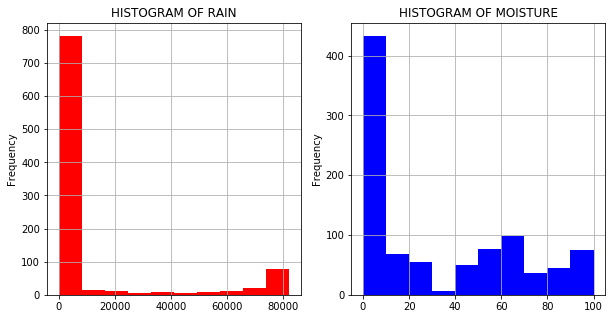

In [13]:
Q4()

In [14]:
#-------------------------QUESTION 5 -------------------------------#

def Q5 ():
	gkk = dataframe.groupby('stationid') # here i am using group by function for grouping the data
	fig,axs=plt.subplots(2,5,figsize=(15,7)) 
	count=0
	colors = ['red','blue','green','black','lightcoral','lightskyblue','gold','#ac1bc1','#d11554','#16c918']
	r = 0; c= 0
	for s,j in gkk: # using for loop ploting histogram of rain for all 10 station  
	    j['rain'].plot.hist(ax=axs[r,c],color=colors[count],title=("HISTOGRAM OF RAIN FOR "+s.upper()),grid=True)
	    count+=1
	    c+=1
	    if c==5 :
	        c=0
	        r+=1
	    fig.tight_layout(pad=2.0)
	plt.show()


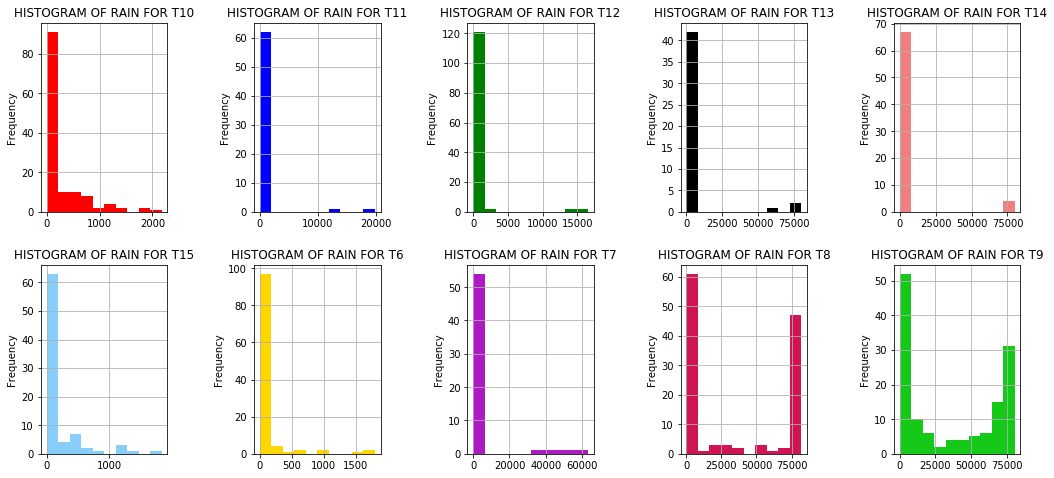

In [15]:
Q5()

In [16]:
#----------------------------QUESTION 6-------------------------------#

def Q6 ():
    print("BOXPLOT OF RAIN AND MOISTURE")
    fig,axs=plt.subplots(1,2,figsize=(5,10)) 
    dataframe.boxplot(column=['rain'],ax=axs[0]) # ploting boxplot of rain using boxplot function
    dataframe.boxplot(column=['moisture'],ax=axs[1])# ploting boxplot of moisture using boxplot function
    fig.tight_layout(pad=2.0)
    plt.show()

BOXPLOT OF RAIN AND MOISTURE


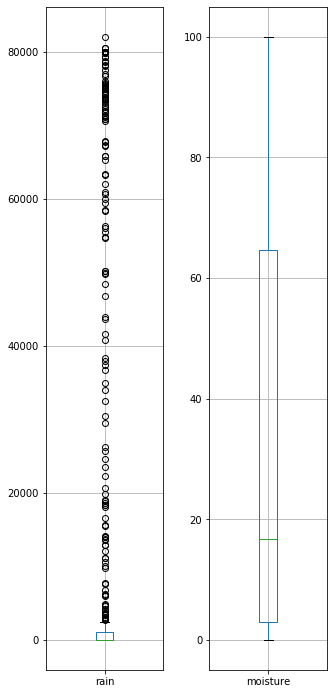

In [17]:
Q6()